In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('bukayo_saka_data.csv')
data['Season'] = data['Season'].str.split('/').str[0]
data

,No,Season,Team,Apps,Min,G,A,Sh90,KP90,xG,xA,xG90,xA90
0,1,2023,Arsenal,11,962,4,4,2.06,2.34,4.65,3.34,0.44,0.31
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,7.04,0.32,0.20
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,7.63,0.29,0.23
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,4.51,0.25,0.16
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19


In [23]:
tr_data = data
tr_data = tr_data.drop(0)

In [24]:
current_season = '2023'
predicted_apps = 37

In [25]:
data['xG_trend'] = data['xG'] / data['Apps'] * predicted_apps
data['xA_trend'] = data['xA'] / data['Apps'] * predicted_apps
data

,No,Season,Team,Apps,Min,G,A,Sh90,KP90,xG,xA,xG90,xA90,xG_trend,xA_trend
0,1,2023,Arsenal,11,962,4,4,2.06,2.34,4.65,3.34,0.44,0.31,15.640909,11.234545
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,7.04,0.32,0.20,11.002632,6.854737
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,7.63,0.29,0.23,9.649211,7.429211
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,4.51,0.25,0.16,8.290313,5.214688
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19,1.622308,5.236923


In [26]:
model_xG = LinearRegression()
model_xA = LinearRegression()

In [27]:
X_xG = data[['Season']].astype(int).values
y_xG = data['xG_trend'].values
X_xA = data[['Season']].astype(int).values
y_xA = data['xA_trend'].values

In [28]:
model_xG.fit(X_xG, y_xG)
model_xA.fit(X_xA, y_xA)

LinearRegression()

In [29]:
curr_season_xG = data[data['Season'] == current_season]['xG'].values[0]
curr_season_xA = data[data['Season'] == current_season]['xA'].values[0]

In [30]:
projected_xG = curr_season_xG + model_xG.predict([[int(current_season)]])[0]
projected_xA = curr_season_xA + model_xA.predict([[int(current_season)]])[0]

In [33]:
print(f"Projected final xG: {projected_xG:.2f}")
print(f"Projected final xA: {projected_xA:.2f}")

Projected final xG: 20.04
Projected final xA: 13.26


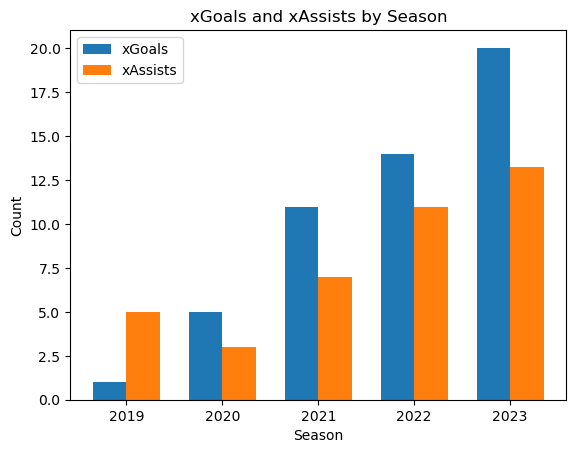

In [32]:
seasons = data['Season'].unique()
seasons = seasons[seasons != '2023']  # Exclude 2023 season

seasons = [int(season) for season in seasons]
seasons.sort()  # Sort seasons in ascending order

seasons = [str(season) for season in seasons]

goals = []
assists = []
for season in seasons:
    season_goals = data[data['Season'] == season]['G'].values[0]
    season_assists = data[data['Season'] == season]['A'].values[0]
    goals.append(season_goals)
    assists.append(season_assists)

seasons.append('2023')
goals.append(projected_xG)
assists.append(projected_xA)

width = 0.35
x = np.arange(len(seasons))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, goals, width, label='xGoals')
rects2 = ax.bar(x + width/2, assists, width, label='xAssists')

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('xGoals and xAssists by Season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()
